# LSTM

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#reading data
df = pd.read_csv('C:/Users/PC/OneDrive - gachon.ac.kr/바탕 화면/ai-study/mhealth_full.csv')
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [4]:
df.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity', 'subject'],
      dtype='object')

### 1.acc_ch_x, acc_ch_y, acc_ch_z: 가슴 부위의 가속도계 X, Y, Z 축 데이터
### 2.acc_la_x, acc_la_y, acc_la_z: 왼팔 부위의 가속도계 X, Y, Z 축 데이터
### 3.gyr_la_x, gyr_la_y, gyr_la_z: 왼팔 부위의 자이로스코프 X, Y, Z 축 데이터
### 4.mag_la_x, mag_la_y, mag_la_z: 왼팔 부위의 자력계 X, Y, Z 축 데이터
### 5.acc_rw_x, acc_rw_y, acc_rw_z: 오른쪽 손목 부위의 가속도계 X, Y, Z 축 데이터
### 6.gyr_rw_x, gyr_rw_y, gyr_rw_z: 오른쪽 손목 부위의 자이로스코프 X, Y, Z 축 데이터
### 7.mag_rw_x, mag_rw_y, mag_rw_z: 오른쪽 손목 부위의 자력계 X, Y, Z 축 데이터
### 8.activity: 수행된 활동의 유형
### 9.subject: 데이터를 수집한 대상 (피험자)

### - df에서 특정 활동(activity) 값에 따라 데이터를 분리하고, 다시 이를 하나의 데이터프레임으로 결합하는 과정

In [5]:
df_activity_1 = df[df['activity'] == 1]
df_activity_2 = df[df['activity'] == 2]
df_activity_3 = df[df['activity'] == 3]
df_activity_4 = df[df['activity'] == 4]
df_activity_5 = df[df['activity'] == 5]
df_activity_6 = df[df['activity'] == 6]
df_activity_7 = df[df['activity'] == 7]
df_activity_8 = df[df['activity'] == 8]
df_activity_9 = df[df['activity'] == 9]
df_activity_10 = df[df['activity'] == 10]
df_activity_11 = df[df['activity'] == 11]
df_activity_12 = df[df['activity'] == 12]

In [6]:
df = pd.concat([df_activity_1, df_activity_2, df_activity_3,            
                df_activity_4, df_activity_5, df_activity_6, df_activity_7,
                df_activity_8, df_activity_9, df_activity_10, df_activity_11,df_activity_12])

In [7]:
df.activity.value_counts()

activity
1     30720
2     30720
3     30720
4     30720
5     30720
9     30720
10    30720
11    30720
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['activity']=le.fit_transform(df['activity'])

In [9]:
df.activity.value_counts()

activity
0     30720
1     30720
2     30720
3     30720
4     30720
8     30720
9     30720
10    30720
6     29441
7     29337
5     28315
11    10342
Name: count, dtype: int64

## 다음과 같이 설정
### x=activity를 제외한 나머지
### y=activity
### 이때 subject는 제외하고 한다.

In [10]:
X = df.drop(['activity', 'subject'], axis=1)
y = df['activity']

In [11]:
X.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z'],
      dtype='object')

In [12]:
# Scale full set of predictors
X_scaled = StandardScaler().fit_transform(X)

In [13]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((257396, 21), (85799, 21), (257396,), (85799,))

In [15]:
# Scale train/ test predictors based on training data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Reformat the training data into sequence samples
# Source: https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [17]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train_scaled, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test_scaled, y_test_array]

In [18]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity. 

X_train_seq, y_train_seq = split_sequences(train_set, 25)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, 25)
print(X_test_seq.shape, y_test_seq.shape)

(257372, 25, 21) (257372,)
(85775, 25, 21) (85775,)


In [19]:
# Convert output variables to categorical for CNN
y_train_seq = to_categorical(y_train_seq)
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)

(257372, 12)
(85775, 12)


In [20]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

25 21 12


## Keras를 사용하여 LSTM(Long Short-Term Memory) 기반의 순차 모델을 정의 
## 시간 시퀀스 데이터를 처리하도록 설계되어 있으며, 드롭아웃과 Dense 레이어를 통해 학습을 진행

## 1.Sequential 모델
#### 순차적으로 레이어를 쌓아가는 모델입니다.


## 2.LSTM 레이어
#### units=128: LSTM 레이어의 뉴런 수입니다.
#### input_shape=(n_timesteps, n_features): 입력 데이터의 형태를 지정합니다. 
#### n_timesteps는 타임 스텝의 수, n_features는 각 타임 스텝에서의 특징 수입니다.


## 3.Dropout 레이어
#### Dropout(0.5): 드롭아웃 비율을 50%로 설정하여 과적합을 방지합니다.


## 4.Dense 레이어
#### Dense(128, activation='relu'): 128개의 뉴런을 가진 Dense 레이어로, 활성화 함수로 ReLU를 사용합니다.
#### Dense(n_outputs, activation='softmax'): 출력 레이어로, 클래스의 수 (n_outputs) 만큼의 뉴런을 가지며, 활성화 함수로 소프트맥스를 사용합니다. 
#### 이는 다중 클래스 분류에 적합합니다.


## 5.모델 컴파일
#### optimizer='adam': Adam 옵티마이저를 사용합니다.
#### loss='categorical_crossentropy': 다중 클래스 분류를 위한 손실 함수로 categorical crossentropy를 사용합니다.
#### metrics=['accuracy']: 평가 지표로 정확도를 사용합니다.

In [21]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          76,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,860 (370.55 KB)

 Trainable params: 94,860 (370.55 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Fit model on training data with 10 epochs
model.fit(X_train_seq, y_train_seq, epochs=10)

Epoch 1/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 0.7583 - loss: 0.7010
Epoch 2/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - accuracy: 0.9302 - loss: 0.1912
Epoch 3/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - accuracy: 0.9502 - loss: 0.1374
Epoch 4/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - accuracy: 0.9601 - loss: 0.1102
Epoch 5/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - accuracy: 0.9648 - loss: 0.0965
Epoch 6/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - accuracy: 0.9682 - loss: 0.0869
Epoch 7/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - accuracy: 0.9717 - loss: 0.0786
Epoch 8/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - accuracy: 0.9725 - loss: 0.0744
Epoch 9/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 51s 6ms/step - accuracy: 0.9752 - loss: 0.0703
Epoch 10/10
8043/8043 ━━━━━━━━━━━━━━━━━━━━ 51s 6ms/step - accuracy: 0.9760 - loss: 0.0665


### model.evaluate:

##### X_test_seq: 테스트 데이터의 입력 시퀀스
##### y_test_seq: 테스트 데이터의 정답 레이블(원-핫 인코딩)
##### model.evaluate는 테스트 데이터에 대한 손실값과 평가 지표(여기서는 정확도)를 계산합니다.

### _, accuracy:
##### model.evaluate 함수는 손실값과 평가 지표를 반환합니다. 여기서 우리는 손실값을 무시하고( _로 처리), 정확도만을 변수 accuracy에 저장합니다.

### print(accuracy):
##### 계산된 정확도를 출력합니다.

In [24]:
# Evaluate model against test data
_, accuracy = model.evaluate(X_test_seq, y_test_seq)
print(accuracy)

2681/2681 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9888 - loss: 0.0330
0.9885397553443909


#### results_summarizer 함수는 혼동 행렬을 시각화하고 정확도, 정밀도, 재현율, F1 점수를 출력합니다

y_test[24:]의 타입: <class 'numpy.ndarray'>, y_pred의 타입: <class 'numpy.ndarray'>
y_test[24:]의 첫 5개 요소: [2 9 6 4 6]
y_pred의 첫 5개 요소: [4 5 6 6 4]


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


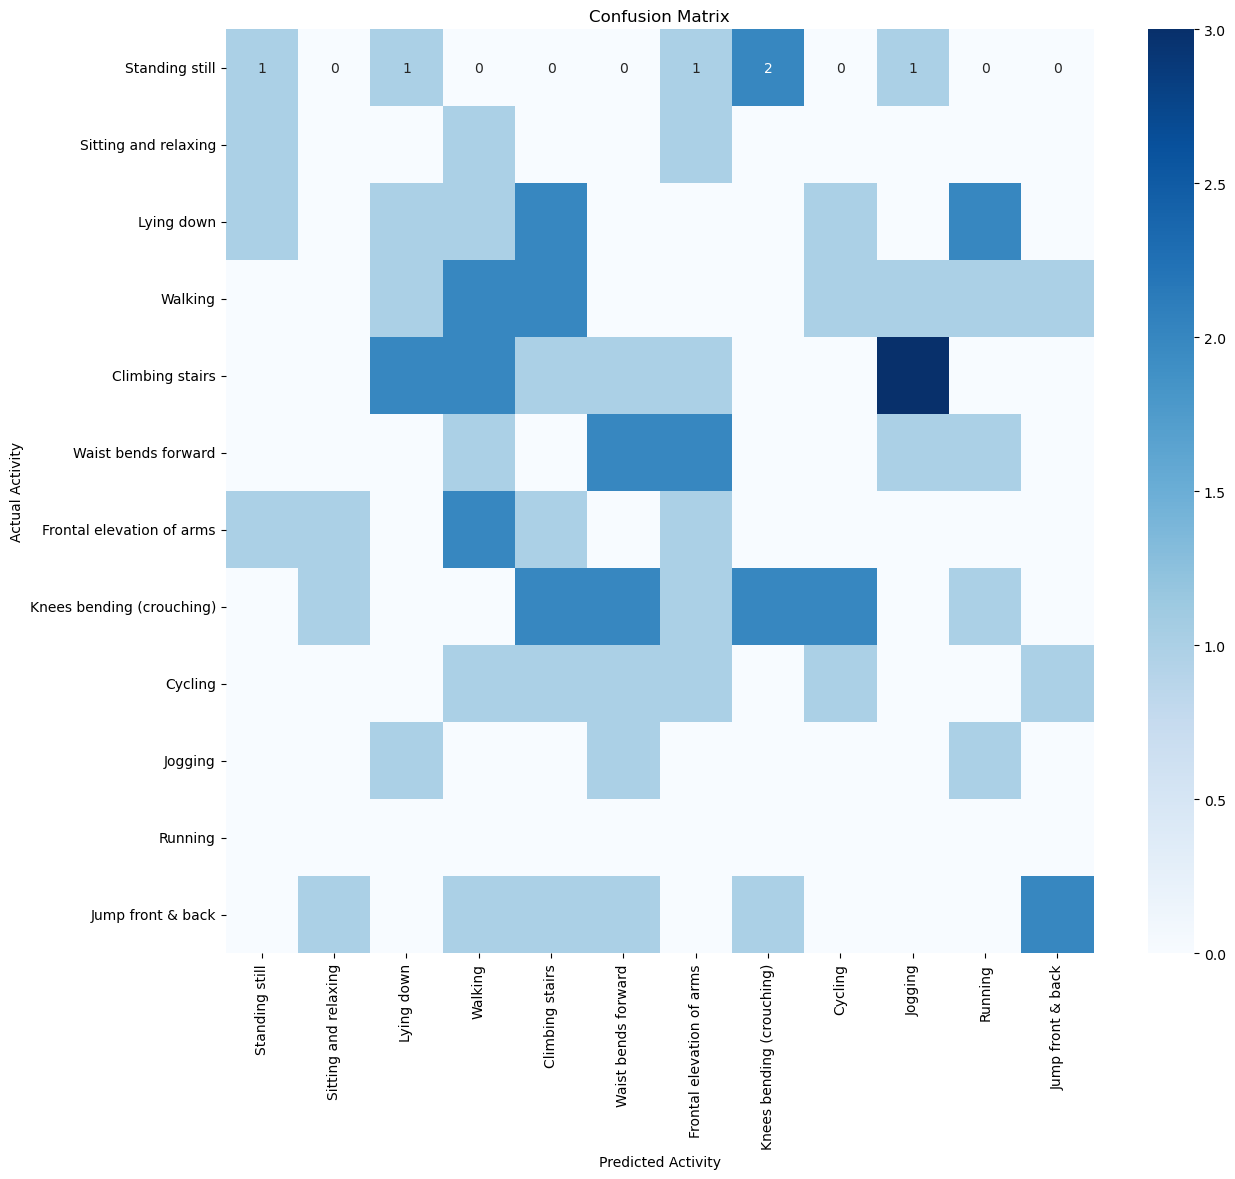

Accuracy Score: 17.1053%
Precision Score: 18.1124%
Recall Score: 14.1706%
F_1 Score: 15.3986%


In [36]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# results_summarizer 함수 정의
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {        
        0: 'Standing still',
        1: 'Sitting and relaxing',
        2: 'Lying down',
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

# 예시 데이터 (실제 데이터로 대체)
y_test = np.random.randint(0, 12, size=100)  # 실제 y_test 데이터로 대체
y_pred = np.random.randint(0, 12, size=76)   # 실제 y_pred 데이터로 대체

# y_test와 y_pred가 정의되었는지 확인
if 'y_test' not in locals() or 'y_pred' not in locals():
    raise NameError("y_test 또는 y_pred 변수가 정의되지 않았습니다.")

# y_test와 y_pred가 None이 아닌지 확인
if y_test is None or y_pred is None:
    raise ValueError("y_test 또는 y_pred가 None입니다.")

# y_test[24:]와 y_pred의 길이가 일치하는지 확인
if len(y_test[24:]) != len(y_pred):
    raise ValueError("y_test[24:]와 y_pred의 길이가 일치하지 않습니다.")

# 타입과 첫 몇 개의 요소 출력하여 확인
print(f"y_test[24:]의 타입: {type(y_test[24:])}, y_pred의 타입: {type(y_pred)}")
print(f"y_test[24:]의 첫 5개 요소: {y_test[24:][:5]}")
print(f"y_pred의 첫 5개 요소: {y_pred[:5]}")

# 결과 요약 함수 호출
results_summarizer(y_test[24:], y_pred)

### classification_report와 confusion_matrix를 사용하여 모델의 성능을 평가합니다

### classification_report:
##### classification_report는 각 클래스에 대한 정확도, 정밀도, 재현율, F1 점수를 계산하여 출력합니다.
##### 이 보고서는 다중 클래스 분류 문제의 성능을 평가하는 데 유용합니다.

### confusion_matrix:
##### confusion_matrix는 혼동 행렬을 계산하여 각 클래스의 예측과 실제 레이블 간의 일치를 시각적으로 나타냅니다. 
##### 혼동 행렬은 모델이 각 클래스에서 어떻게 예측했는지의 정보를 제공합니다.

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test[24:],y_pred))
print('*'*50)
print(confusion_matrix(y_test[24:], y_pred))

              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.00      0.00      0.00         3
           2       0.17      0.12      0.14         8
           3       0.18      0.22      0.20         9
           4       0.10      0.10      0.10        10
           5       0.25      0.29      0.27         7
           6       0.12      0.17      0.14         6
           7       0.40      0.18      0.25        11
           8       0.20      0.17      0.18         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0
          11       0.50      0.29      0.36         7

    accuracy                           0.17        76
   macro avg       0.18      0.14      0.15        76
weighted avg       0.22      0.17      0.19        76

**************************************************
[[1 0 1 0 0 0 1 2 0 1 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 1 2 0 0 0 1 0 2 0]
 

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
